## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 7

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')
#plt.style.use('seaborn-colorblind')
pd.set_option('max_rows', 9)

In [68]:
print(plt.style.available)

['_classic_test', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-notebook', 'seaborn-colorblind', 'grayscale', 'seaborn-dark-palette', 'seaborn-deep', 'ggplot', 'seaborn-poster', 'seaborn-ticks', 'seaborn-muted', 'Solarize_Light2', 'seaborn-white', 'seaborn-pastel', 'classic', 'seaborn-talk', 'dark_background', 'fast', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-whitegrid', 'seaborn-bright', 'fivethirtyeight']


In [69]:
data_url = ('http://www2.census.gov/programs-surveys/popest/datasets/'
            '2010-2015/national/asrh/nc-est2015-agesex-res.csv')
census = pd.read_csv(data_url)
census

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
1,0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
2,0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
3,0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
...,...,...,...,...,...,...,...,...,...,...
302,2,98,36641,36675,37532,40116,42857,44359,46208,47272
303,2,99,26193,26214,26074,27030,29320,31112,32517,34064
304,2,100,44202,44246,45058,47556,50661,53902,58008,61886
305,2,999,156964212,156969328,157258820,158427085,159581546,160720625,161952064,163189523


In [103]:
graph_data = (census
    .loc[(census['AGE'] < 999) & (census['SEX'] == 0)]
    .loc[:, ['AGE', 'POPESTIMATE2010', 'POPESTIMATE2015']]
    .rename(columns={'POPESTIMATE2010':'2010', 'POPESTIMATE2015':'2015'})
)
              
graph_data['Change'] = graph_data['2015'] - graph_data['2010']
graph_data['Growth'] = graph_data['Change'] / graph_data['2010']
graph_data['Annual_growth'] = (graph_data['Growth'] + 1) ** (1 / 5) - 1

graph_data

,AGE,2010,2015,Change,Growth,Annual_growth
0,0,3951330,3978038,26708,0.006759,0.001348
1,1,3957888,3968564,10676,0.002697,0.000539
2,2,4090862,3966583,-124279,-0.030380,-0.006151
3,3,4111920,3974061,-137859,-0.033527,-0.006797
...,...,...,...,...,...,...
97,97,68893,92377,23484,0.340876,0.060420
98,98,47037,61991,14954,0.317920,0.056764
99,99,32178,43641,11463,0.356237,0.062838
100,100,54410,76974,22564,0.414703,0.071848


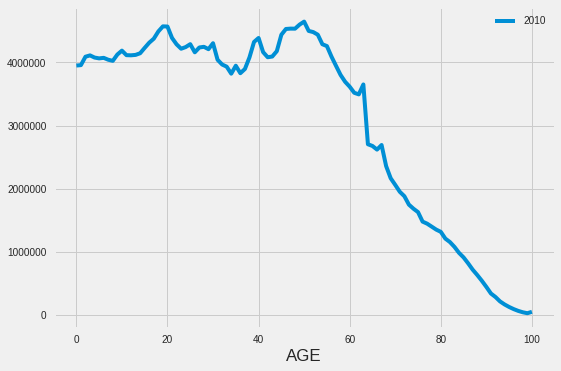

In [106]:
# Plot 2010
graph_data.plot.line('AGE', '2010')
#graph_data.plot.line(0, 0)  # Equivalent - note: indexing for y doesn't include the column used as x
plt.show()

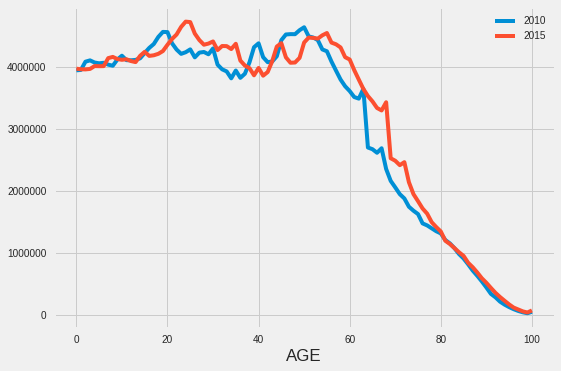

In [115]:
#graph_data.plot.line('AGE', ['2010', '2015'])  # Works be gives irrelevent warning
graph_data[['AGE', '2010', '2015']].plot.line('AGE')   # Avoids warning by not needing argument for y
                                                       # (in the absence of y arg plots all columns except x)
plt.show()

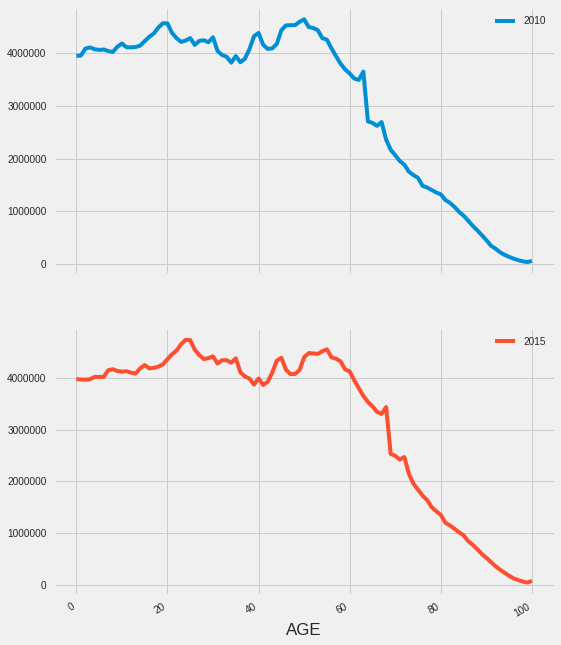

In [120]:
graph_data[['AGE', '2010', '2015']].plot.line('AGE', subplots=True, figsize=(8,12))  

plt.show()

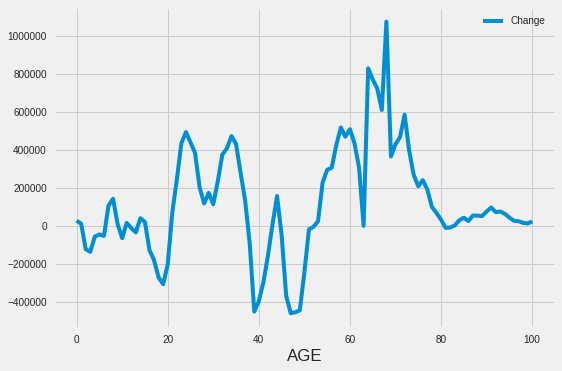

In [122]:
graph_data.plot.line('AGE', 'Change')
plt.show()

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
...,...,...,...,...,...,...
46,Philip Seymour Hoffman,2463.7,40,61.6,Catching Fire,424.7
47,Sandra Bullock,2462.6,35,70.4,Minions,336.0
48,Chris Evans,2457.8,23,106.9,The Avengers,623.4
49,Anne Hathaway,2416.5,25,96.7,The Dark Knight Rises,448.1


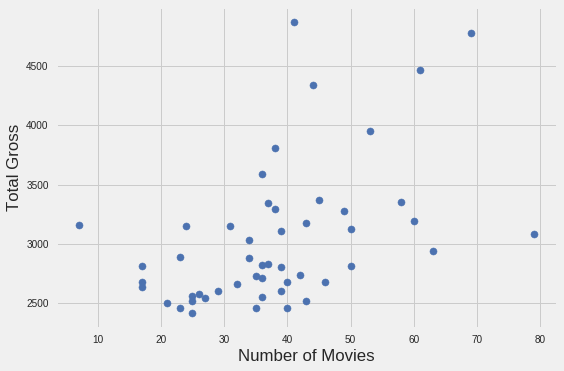

In [200]:
actors = pd.read_csv('data/actors.csv')
display(actors)
actors.plot.scatter('Number of Movies', 'Total Gross', s=50)
plt.show()

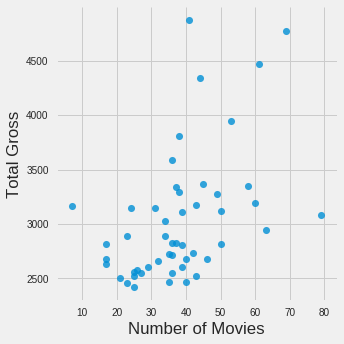

In [182]:
import seaborn as sns

sns.lmplot('Number of Movies', # Horizontal axis
           'Total Gross', # Vertical axis
           data=actors, # Data source
           fit_reg=False, # Don't fix a regression line
           #hue='Average per Movie',  # Set color by value in a dataframe column
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50}) # S marker size

plt.show()

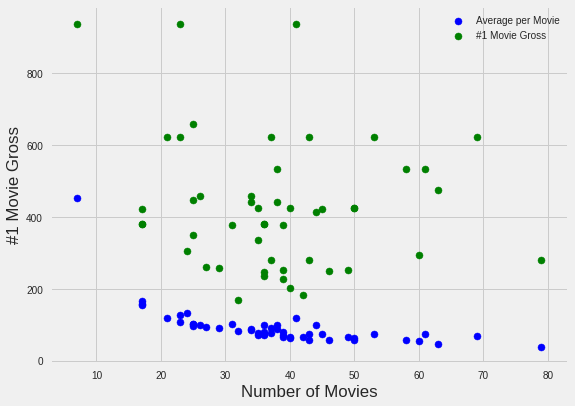

In [199]:
# Scatter overlay with a common x
#   There's probably an easier ways to do this
actors.rename({'Gross':'#1 Movie Gross'}, axis='columns', inplace=True)

x_label = 'Number of Movies'
y_labels = ['Average per Movie', '#1 Movie Gross']
colors = ['blue', 'green']

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])  # Position on figure 0 to 1 
for y_label, color in zip(y_labels, colors):
    actors.plot.scatter(x_label, y_label, label=y_label, color=color, 
                        s=(plt.rcParams['lines.markersize']) ** 2,
                        ax=ax)
plt.show()

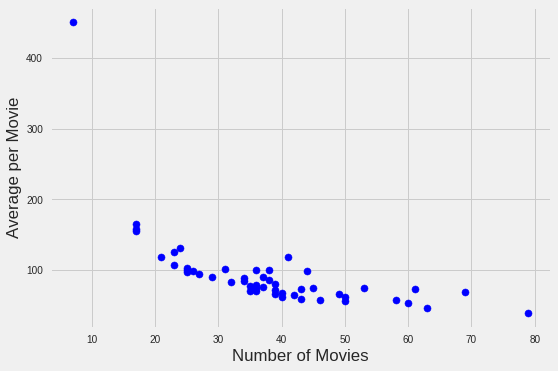

In [203]:
actors.plot.scatter('Number of Movies', 'Average per Movie', color='blue', s=50)
plt.show()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
...,...,...,...,...,...
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016
199,Who Framed Roger Rabbit,Buena Vista,156452370,338409100,1988


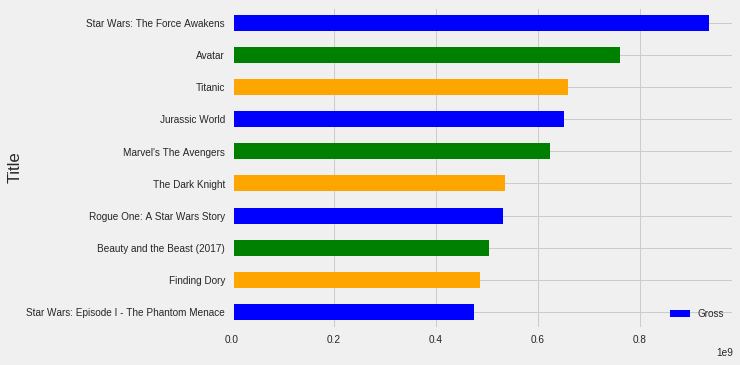

In [234]:
top_movies = pd.read_csv('data/top_movies_2017.csv')
display(top_movies)

colors = ['blue', 'green', 'orange'] * 30  
# matplotlib places same color next to each other if colors list runs out, hence the * 30

(top_movies
    .sort_values('Gross', ascending=False)
    .head(10)
    .plot.barh('Title', 'Gross', color=colors)
)
plt.gca().invert_yaxis() # Plot top to bottom
plt.show()

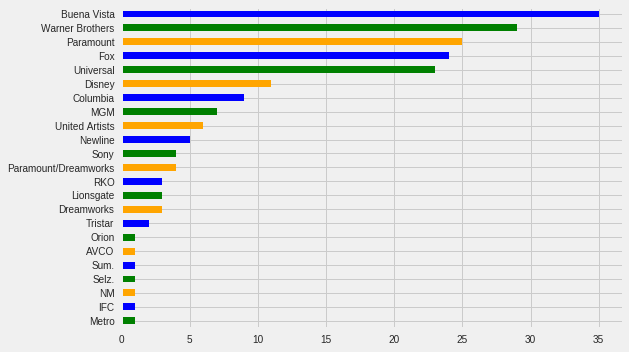

In [231]:
colors = ['blue', 'green', 'orange'] * 30  
# matplotlib places same color next to each other if colors list runs out, hence the * 30

(top_movies
    .Studio
    .value_counts()
    .plot.barh(color=colors)
)
plt.gca().invert_yaxis() # Plot top to bottom
plt.show()